In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pylab import meshgrid,cm,imshow,contour,clabel,colorbar,axis,title,show

## Scores
Define scores, the first one obtainting the delay score in a linear fashion (linear to maximal delay) and the second one calculating the delay score in a non-lienar fashion using a negative exponential (similar to a Gaussian, requiring a scale parameter).

In [2]:
def f1_lin_delay_score(f1_score, delay_sec, max_delay, alpha=1.0):
    #delay_score = np.exp(-(delay_sec ** 2) / scale)
    
    if delay_sec < max_delay:
        delay_score = 1.0 -delay_sec / max_delay 
    else:
        delay_score = 0.0
    
    if f1_score == 0 or delay_score == 0:
        return 0.0
    else:
        return (1+alpha**2)* (f1_score * delay_score) / (alpha**2 * f1_score + delay_score)
    

In [3]:
def f1_delay_score(f1_score, delay_sec, scale=0.1, alpha=1.0):
    delay_score = np.exp(-(delay_sec ** 2) / scale)
    
    
    
    if f1_score == 0 or delay_score == 0:
        return 0.0
    else:
        return (1+alpha**2)* (f1_score * delay_score) / (alpha**2 * f1_score + delay_score)
    

## Error Surface F1-Delay Score
Plots the error surface for different f1 scores and delays (using different scaling parameters and alphas)

In [4]:
scales = [0.2]#0.075, 0.1, 0.2, 0.5, 1.0, 2.0]
alphas = [0.2] #, 0.5, 1.0, 1.5]

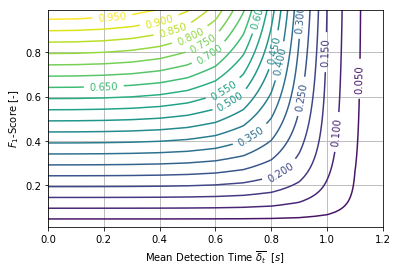

In [5]:
for scale in scales:
    for alpha in alphas:
        f1_scores = np.arange(0.01,1.0,0.01)
        delays = np.arange(0.0,1.50,0.1)
        X,Y = np.meshgrid(delays, f1_scores) # grid of point

        Z = np.zeros((delays.shape[0], f1_scores.shape[0]))
        for i, delay in enumerate(delays):
            for j, f1_score in enumerate(f1_scores):
                Z[i, j] = f1_delay_score(f1_score=f1_score, delay_sec=delay, scale=scale, alpha=alpha)
        Z = Z.transpose()

        levels = np.arange(0, 1,0.05)
        plt.figure()
        CS = plt.contour(X, Y, Z, levels=levels)
        #plt.title(r"$\sigma$ " + str(scale) +", " + r" $\alpha$ " + str(alpha))
        plt.xlabel(r"Mean Detection Time $\overline{\delta_t}$  $[s]$")
        plt.ylabel(r"$F_1$-Score [-]")
        plt.xlim([0, 1.2])
        plt.clabel(CS, inline=1, fontsize=10)
        plt.grid(True)
        plt.savefig("f1_delay.png")
        plt.show()

## Error Surface F1-Linear Delay Score
Plots the error surface for different f1 scores and delays (using various max delay and fixed alpha)

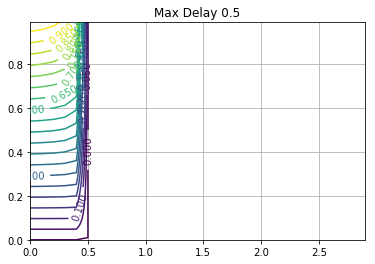

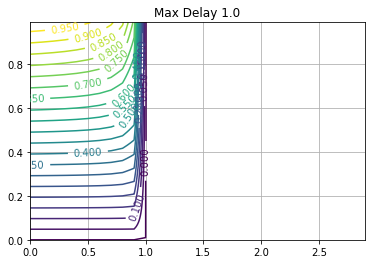

In [150]:
max_delays = [0.5, 1.0, 2.0]
for max_delay in max_delays:
    f1_scores = np.arange(0.0,1.0,0.01)
    delays = np.arange(0.0,3.0,0.1)
    X,Y = np.meshgrid(delays, f1_scores) # grid of point

    Z = np.zeros((delays.shape[0], f1_scores.shape[0]))
    for i, delay in enumerate(delays):
        for j, f1_score in enumerate(f1_scores):
            Z[i, j] = f1_lin_delay_score(f1_score=f1_score, delay_sec=delay, max_delay=max_delay, alpha=0.2)
    Z = Z.transpose()

    levels = np.arange(0, 1,0.05)
    plt.figure()
    CS = plt.contour(X, Y, Z, levels=levels)
    plt.title("Max Delay " + str(max_delay))
    plt.clabel(CS, inline=1, fontsize=10)
    plt.grid(True)
    plt.show()